# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9am EST** 

*Homework typically graded by Thursday 5p*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** If your ```IPython``` version is too old, we will *not* be able to grade your assignments.


# Phys 260 Python Tutorial/HW 10: Alternating Current Circuit  (30 points total)

## Tutorial Summary
- Brief review of the RL Circuit model 
- Implementing an oscillating voltage

In [3]:
import numpy as np
from matplotlib import pyplot as plt

## An alternating-current (AC) circuit

In the preflight, we considered a constant voltage source.  The same code can accommodate a situation where the current is changing in time due to varying the voltage of the battery.  In the update step, we can additionally update the voltage of the battery at each time step along with the other values in the circuit. We will replace the battery from the preflight with a generator that produces a sinusoidal voltage,
$$
            V = V_0\sin\omega t.
$$

<img src="http://www-personal.umich.edu/~gerdes/img/LR_AC.jpg">

Note, there are two different timescales in the problem: the characteristic time of the $RL$ circuit $\tau = L/R$, and the period of the generator, $T=2\pi/\omega$. For this tutorial/hw, we will hold $\tau$ fixed and investigate what happens as we change $\omega$, varying $\omega$ proportional to $1/\tau$.

### Think through the code changes (Part I)

**In groups** (5 min -- 5 points):  
- What additional attributes might we need in the `__init__`?  (Hint, for current, we initialize a `_now` value, and also a `_vals` list to collect the change now values over time.)
- At $t=0$, what is the voltage delivered by the generator?  
- How might we update the battery voltage?  (Hint, when discretizing time evolution in a system, $\Delta V = \frac{\Delta V}{\Delta t}\times \Delta t$)  What do we need to calculate $\frac{\Delta V}{\Delta t}$?  

- We also need `self.voltage_now` (current voltage of provided by the generator), `self.voltage_vals` (voltage of generator over all timesteps), the constant `self.v0`, and possibly `self.omega` (or this can be defined in the evolve step).
- We can explicitly calculate $\frac{dV(t)}{dt}=V_0 \omega\cos(\omega t)$, making the update step: 

`self.voltage += self.v0 * self.omega * np.cos(self.omega*self.timestep)`

- At $t=0$, the voltage is $V_0$.

### Think through the code changes (Part II)
**In groups** (4 min -- 4 points):
- What might be an alternative way to update the voltage provided by the generator that is less affected by discretization?
- The class `RLCircuit` had three input parameters and its method `evolve_circuit` had two arguments. The internal method `_set_now_vals` had no arguments, and `_set_timesteps` had two.  What additional input parameters and/or arguments might be needed to model an alternating current RLCircuit, `AltRLCircuit` below?

- Use the actual expression for V(t): `self.voltage = self.v0 * np.sin(self.omega*self.timestep)`
- Depending on where `self.omega` is defined, this needs to be input to either the `__init__` or the `evolve_circuit` method.  The `_set_now_vals` will need the current timestep since the voltage depends on the total time elapsed.

### Make the appropriate changes (small groups 10 min - 10 points)

Make the appropriate changes in the code below.  You may find it useful to refer to the skeleton provided by the preflight to fill out the input parameters, docstrings, etc.  Make sure to:
- Fill out the call signature and docstrings of the `__init__` (check if you need additional input parameters).
- Define the additional attributes necessary to update and keep track of the voltage produced by the generator
- Fill out the call signature of the `evolve_circuit` method (check if you need an additional arguments)
- Fill out the code that updates the voltage provided by the generator at a given timestep
- Fill out the call signature of the internal method `_set_now_vals` (check if you need additional input parameters)

In [17]:
class AltRLCircuit :
    def __init__(
    ### BEGIN SOLUTION
        self, v0, resistance, inductance, omega) :
        """
        Parameters
        ----------
        v0 : float
            initial voltage from generator
        resistance : float
            value of resistance in ohms
        inductance : float 
            value of inductance in Henries
        omega : angular frequency of generator
        """
   ### END SOLUTION     
        self.resistance = resistance
        self.inductance = inductance
        
        # Initialize other necessary attributes 
        self.tau = inductance / resistance
        self.i_now = 0
        ### BEGIN SOLUTION
        self.voltage_L_now = 0
        self.v0 = v0
        self.voltage_now = 0
        self.omega = omega
        ### END SOLUTION
        
        # Initialize the lists that contain time varying values
        self.i_vals = []
        self.timesteps = np.array([]) 
        ### BEGIN SOLUTION
        self.vl_vals = []
        self.voltage_vals = []
        ### END SOLUTION
        
        
    def _set_now_vals(
        ### BEGIN SOLUTION
        self, timestep) :
        """Calculate "now" values in terms of other attributes, setting attributes
        Parameters
        ----------
        timestep : float
            timestep of the time integration corresponding to "now" 
        """
        ### END SOLUTION
        voltage_R = self.i_now*self.resistance
        self.voltage_L_now = self.voltage_now - voltage_R    
        self.i_now += self.voltage_L_now/self.inductance * self.dt
        ### BEGIN SOLUTION
        self.voltage_now = self.v0*np.sin(self.omega * timestep)
        #self.voltage_now += self.omega * self.v0 * np.cos(self.omega * timestep)
        ### END SOLUTION
        
    def _set_timesteps(self, num_timescales, num_timesteps_per_timescale) :        
        """Internal method. Sets the attributes num_timesteps and dt.
        Parameters
        ----------
        num_timescales : floattimestep 
            number of timescales to evolve over
        num_timesteps_per_timescale : int
            number of timesteps per characteristic timescale, defines the time resolution 
        """
        
        self.dt = self.tau / num_timesteps_per_timescale
        print(self.dt)

        next_timesteps = np.arange(0, self.tau * num_timescales, self.dt)
        print('next_timesteps shape: ',next_timesteps.shape)
        try :
            last_timestep = self.timesteps[-1]
            next_timesteps += last_timestep
            self.timesteps = np.concatenate([self.timesteps, next_timesteps])
            
        except IndexError : 
            self.timesteps = next_timesteps        

    def evolve_circuit(
        ### BEGIN SOLUTION
        self, num_timescales, num_timesteps_per_timescale) :
        """Evolve the spring, populate the acceleration, velocity and position (a_vals, v_vals, x_vals)
        Parameters
        ----------
        num_periods : float
            number of periods to evolve over
        num_timesteps_per_period : int
            number of timesteps per period, defines the time resolution
        """
        ### END SOLUTION
        self._set_timesteps(num_timescales, num_timesteps_per_timescale)
        # Time evolve the circuit using self._set_now_vals() and store values at each timestep
        for timestep in np.arange(0, self.tau * num_timescales, self.dt) :
            # Populate i_vals and q_vals with current current and charge on capacitor
            self.i_vals.append(self.i_now)  
            
            ### BEGIN SOLUTION
            self.vl_vals.append(self.voltage_L_now)
            self.voltage_vals.append(self.voltage_now)            
            # Update "now" values: q_now, and i_now (i_now can be updated with a method)
            self._set_now_vals(timestep)             
            ### END SOLUTION

In [18]:
"""Execute to check you're on the right track"""
test_arl = AltRLCircuit(10,1,1,1)
test_arl.evolve_circuit(5,100)
assert(test_arl.i_vals[0] < np.abs(test_arl.i_vals[-1]))

0.01
next_timesteps shape:  (500,)


**In class**: Let us review the class that models the RL circuit, but now with a battery voltage that varies with time.  This may differ in order, code line groupings, and/or variable name choices than what you previously did to build your code in the preflight.  It is useful to note differences in code that accomplishes the same end-goal.

### Create an instance of the circuit (1 points)

Create an instance of this circuit, `arlc`, where,  
* $V_0 = 10$ Volts
* $L = 1$ H
* $R = 1~\Omega$

Evolve over 5 characteristic timescales, $t_{tot}=10\tau$, and let $\omega=1/\tau=L/R$

In [19]:
### BEGIN SOLUTION
arlc = AltRLCircuit(10,1,1,1)
arlc.evolve_circuit(10, 100)
### END SOLUTION

0.01
next_timesteps shape:  (1000,)


In [20]:
"""Execute to check you're on the right track"""
assert(arlc.i_vals[0] <= np.abs(arlc.i_vals[-1]))

### Plot voltages (2 points -- start in class, take home for polishing)

*Overplot* the voltage across the resistor, inductor, and generator as a function of time (in units of $\tau$).  Full credit for adding a legend, useful axes labels.  To more carefully see the behavior, I would recommend adding a [grid](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html) to the axis. 

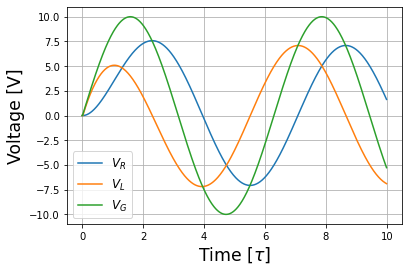

In [21]:
### BEGIN SOLUTION
plt.plot(arlc.timesteps/arlc.tau, np.array(arlc.i_vals)*arlc.resistance, label='$V_R$')
plt.plot(arlc.timesteps/arlc.tau, np.array(arlc.vl_vals), label='$V_L$')
plt.plot(arlc.timesteps/arlc.tau, np.array(arlc.voltage_vals), label='$V_G$')
plt.legend(fontsize='large')
plt.ylabel('Voltage [V]', fontsize='xx-large')
plt.xlabel('Time [$\\tau$]', fontsize='xx-large')
plt.grid()
#plt.gca().grid()
### END SOLUTION

### Discuss your plot (1 point -- likely take home)

Discuss your plot.  In particular, examine if $V_L$ and $V_R$ reach their peak values at the same time? If not, what is the phase difference between these two sinusoidal voltages?  How many units of $\tau$ does it take for $V_G$ to reach a full cycle?

The resistor voltage starts out at 0, as we expect since the current is also 0.  The peak generator voltage is at $t=0$, as is the inductor.  The inductor voltage and the resistor voltage are out of phase, with $V_{R}$ trailing $V_L$ by 90 degrees.  It takes 2$\pi\tau$ for $V_G$ to make a full cycle.  Note, $\tau=1/\omega$, and one full cycle is $T=2\pi/\omega=2\pi\tau$.

## Homework Summary (10 points)
- Make a *Bode Plot*.  We will vary $\omega$ from $0.1/\tau$ to $100/\tau$ in equal logarithmic spacings (take a look at the <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.logspace.html">numpy documentation</a> for ```np.logspace()```).  Then, we will make a log-log plot of $V_{L,\mathrm{peak}}/V_0$ vs. $\omega$. (This is known as a <i>Bode plot</i>.) 

Note: you will want to modify your timestep so that it's a small fraction of a generator period (e.g. increase the number of timesteps per timescale to decrease teh timestep). Make sure to wait at least a few full generator cycles before evaluating $V_{L,\mathrm{peak}}$, to allow any transitory behavior due to initial conditions to be washed out. 


### Create the $\omega$ values to sample (2 points)

Use the `np.logspace` to create a sequence of values for omega, `omega_vals`, assuming the same circuit components as in the tutorial (i.e. $R=1\Omega$, $L=1$ H).  

In [22]:
### BEGIN SOLUTION
omega_vals = np.logspace(-2,2,10)
### END SOLUTION
omega_vals

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

In [23]:
"""Execute to check you're on the right track"""
type(omega_vals) == np.ndarray

True

### Calculate the peak inductor voltage (3 points)

You will need to create and evolve an instance of the `AltRLCircuit` for each `omega_val`, and collect the maximum voltage across the after several a timescale or two, e.g. in a list with name `voltages_L_max`.  Note, the larger $\omega$ means a shorter period $T=2\pi/\omega$ (therefore you need a shorter timestep, or more timesteps per timescale, to well-resolve these).  Also, since $\tau$ is fixed, you may want to vary how long you evolve the system depending on $\omega$ to capture full cycles of the period T.

omega:  0.01
0.1
next_timesteps shape:  (10000,)
T= 628.3185307179587
omega:  0.027825594022071243
0.037037037037037035
next_timesteps shape:  (9693,)
T= 225.80597209158475
omega:  0.0774263682681127
0.012987012987012988
next_timesteps shape:  (9933,)
T= 81.15045878714236
omega:  0.21544346900318834
0.004651162790697674
next_timesteps shape:  (9890,)
T= 29.16396276132465
omega:  0.5994842503189409
0.001669449081803005
next_timesteps shape:  (9584,)
T= 10.480984786233785
omega:  1.6681005372000592
0.0005995203836930455
next_timesteps shape:  (16680,)
T= 3.766670633489538
omega:  4.6415888336127775
0.00021547080370609782
next_timesteps shape:  (46410,)
T= 1.3536712389686343
omega:  12.915496650148826
7.742934572202865e-05
next_timesteps shape:  (129150,)
T= 0.486484219490482
omega:  35.93813663804626
2.7825699816350382e-05
next_timesteps shape:  (359380,)
T= 0.17483336352302226
omega:  100.0
1e-05
next_timesteps shape:  (1000000,)
T= 0.06283185307179587


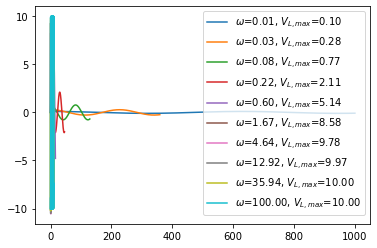

In [24]:
### BEGIN SOLUTION
voltages_L_max = []
voltage_initial = 10
resistance = 1
inductance = 1
for omega_val in omega_vals :
    print('omega: ',omega_val)
    arlc = AltRLCircuit(voltage_initial,resistance,inductance,omega_val)
    timesteps_per_timescale = int(1000*omega_val)
    number_of_timescales = max(int(10./omega_val),10)
    arlc.evolve_circuit(number_of_timescales, timesteps_per_timescale)
    vl_max = np.max(np.array(arlc.vl_vals)[5*timesteps_per_timescale:])
    voltages_L_max.append(vl_max)
    print('T=',(2*np.pi/arlc.omega))
    plt.plot(arlc.timesteps, arlc.vl_vals, label='$\\omega$=%.2f, $V_{L,max}$=%.2f'%(omega_val,vl_max))
plt.legend()
### END SOLUTION

In [25]:
"""Execute to check you're on the right track"""
assert(type(voltages_L_max) == list)

### Make the Bode plot (2 points)

Plot $V_{L,max}/V_0$ (the ratio of the maximum voltage across the inductor to the maximum generator voltage) vs. $\omega$.  Use logarithmic scaling for both the x and y axes.

[0.00999955 0.02781522 0.07719831 0.21063276 0.51427893 0.85775025
 0.97765882 0.99705023 0.9996255  0.99995452]


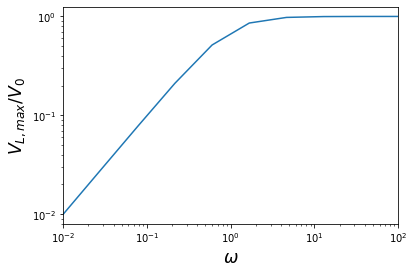

In [26]:
voltage_ratio = np.array(voltages_L_max)/voltage_initial
plt.plot(omega_vals, voltage_ratio)
plt.xlim(0.01,100)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\omega$', fontsize='xx-large')
plt.ylabel('$V_{L,max}/V_0$', fontsize='xx-large')

print(voltage_ratio)

### Open questions (3 points )
- What happens when $\omega\ll 1/\tau$? When $\omega \gg 1/\tau$? When $\omega \approx 1/\tau$?
- Suppose that, instead of driving this circuit with a single frequency $\omega$, you gave it an input signal that consisted of a mixture of different frequencies -- for example, an electrical representation of a piece of music. What would the output of this circuit do to such a signal? Can you think of any applications for a circuit like this? 

- For very small $\omega$ ($\omega\ll 1/\tau$) the inductor voltage is very low. Physically, we think of this as arising from the fact that the current is changing very slowly, and thus creates a slowly-varying emf in the inductor that does not produce a large voltage. From our plot, in this regime the inductor voltage rises linearly with $\omega$.
- For very large $\omega$ ($\omega\gg 1/\tau$) the inductor voltage remains constant and is equal to the generator voltage. Physically, at large $\omega$ the current is small (because the driving voltage is constantly changing direction), so there is never a large voltage drop across the resistor. Therefore the loop rule must be satisfied by having the inductor voltage be nearly equal to (and opposite) the generator voltage.
* The case $\omega = 1/\tau$ is transitional region, where $V_L \sim 0.7 V_0$. (More precisely, as we'll see later, $V_L = V_0/\sqrt{2}$ in this case.)

The net result of all this is that the circuit is efficient at passing high-frequency signals, but attenuates the voltage of low-frequency signals. It's therefore a "high-pass filter", which can be used to filter out low-frequency noise. If you passed a piece of music through this before sending it to your speakers, it would sound like someone turned down the bass and turned up the treble.